In [4]:
import numpy as np
V_0=[39.810,39.910,39.933,39.913,39.852,39.957,39.942,39.918,39.864,39.910,39.930,39.886,39.928,39.858,39.942,39.904,39.928,39.949,39.925,39.943,39.907,39.873,39.870,39.945,39.917,39.946,39.981] # V
V_C=[39.012,38.137,37.002,34.242,32.570,31.028,28.168,25.477,21.025,16.422,12.503,10.612,9.202,8.065,6.966,6.109,5.448,4.805,4.289,3.656,3.291,3.115,2.993,2.825,2.706,2.566,2.380] #V
delta_t=[359.848,340.909,321.970,303.030,344.697,306.818,251.894,255.682,187.500,172.348,145.833,115.530,104.167,98.485,79.545,68.182,68.182,53.977,53.977,45.455,41.667,39.773,37.879,35.227,29.924,32.576,29.167]
Hz=[50,150,200,300,350,400,500,600,800,1100,1500,1800,2100,2400,2800,3200,3600,4100,4600,5400,6000,6300,6600,7000,7300,7700,8300]

phi_list=[]
for i in range(len(delta_t)):
    phi_list.append(2*np.pi*Hz[i]*delta_t[i])
V_c_div_V_0 = []

for i in range(len(delta_t)):
    phi_list.append(V_C[i]/V_0[i])

omega_list=[]
for i in range(len(delta_t)):
    omega_list.append(2*np.pi*Hz[i])



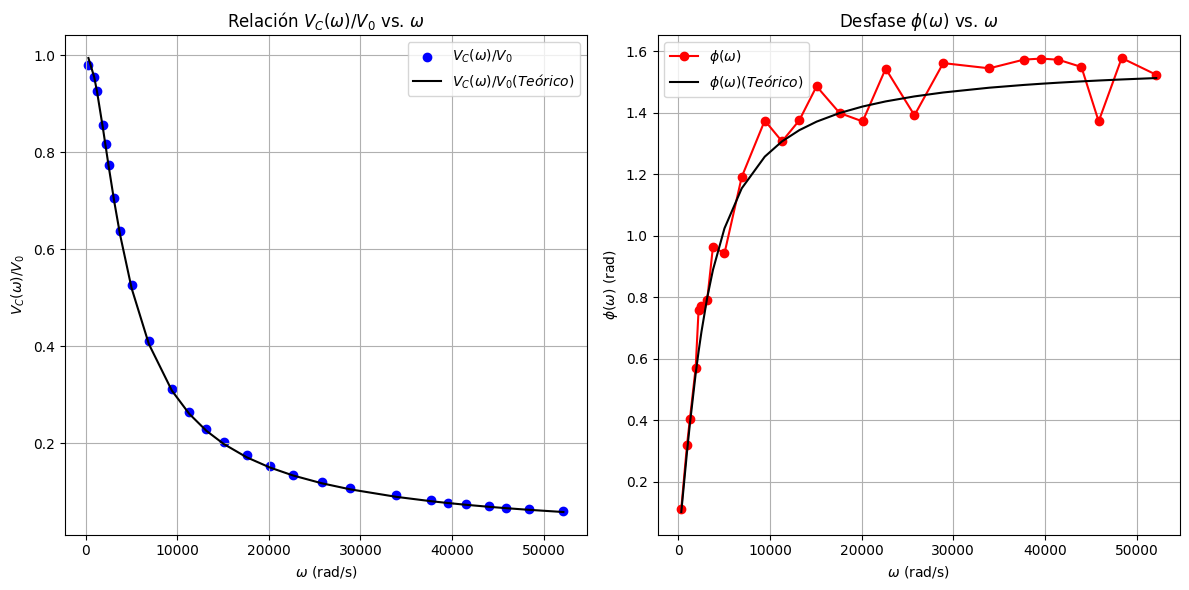

Coeficiente de correlación de Pearson para V_C(ω)/V_0: 0.9999
Coeficiente de correlación de Pearson para φ(ω): 0.9893


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
V_0 = np.round(np.array([39.810, 39.910, 39.933, 39.913, 39.852, 39.957, 39.942, 39.918, 39.864,
                         39.910, 39.930, 39.886, 39.928, 39.858, 39.942, 39.904, 39.928, 39.949,
                         39.925, 39.943, 39.907, 39.873, 39.870, 39.945, 39.917, 39.946, 39.981]), 1)  # V

V_C = np.round(np.array([39.012, 38.137, 37.002, 34.242, 32.570, 31.028, 28.168, 25.477, 21.025,
                         16.422, 12.503, 10.612, 9.202, 8.065, 6.966, 6.109, 5.448, 4.805, 4.289,
                         3.656, 3.291, 3.115, 2.993, 2.825, 2.706, 2.566, 2.380]), 1)  # V

delta_t = np.round(np.array([359.848, 340.909, 321.970, 303.030, 344.697, 306.818, 251.894, 255.682,
                             187.500, 172.348, 145.833, 115.530, 104.167, 98.485, 79.545, 68.182,
                             68.182, 53.977, 53.977, 45.455, 41.667, 39.773, 37.879, 35.227,
                             29.924, 32.576, 29.167]), 1) * 1e-6  # Convertir a segundos

Hz = np.round(np.array([50, 150, 200, 300, 350, 400, 500, 600, 800, 1100, 1500, 1800, 2100, 2400,
                        2800, 3200, 3600, 4100, 4600, 5400, 6000, 6300, 6600, 7000, 7300, 7700, 8300]), 2)  # Hz

# Cálculos
omega = 2 * np.pi * Hz  # Frecuencia angular
phi = 2 * np.pi * Hz * delta_t  # Desfase en radianes
R = 1485
C = 0.22*1e-6
V_c_div_V_0 = V_C / V_0  # Relación de amplitudes
V_c_div_V_0_teorico = 1/np.sqrt(1+(omega*R*C)**2)

phi_teorico = np.arctan(omega*R*C)



# Gráficos
plt.figure(figsize=(12, 6))

# Gráfico 1: V_C(ω)/V_0 vs. ω
plt.subplot(1, 2, 1)
plt.scatter(omega, V_c_div_V_0, marker='o', color='b', label=r"$V_C(\omega)/V_0$")
plt.plot(omega, V_c_div_V_0_teorico, color='black', label=r"$V_C(\omega)/V_0 (Teórico)$")
plt.title(r"Relación $V_C(\omega)/V_0$ vs. $\omega$")
plt.xlabel(r"$\omega$ (rad/s)")
plt.ylabel(r"$V_C(\omega)/V_0$")
plt.grid(True)
plt.legend()

# Gráfico 2: φ(ω) vs. ω
plt.subplot(1, 2, 2)
plt.plot(omega, phi, marker='o', color='r', label=r"$\phi(\omega)$")
plt.plot(omega, phi_teorico, color='black', label=r"$\phi(\omega) (Teórico)$")
plt.title(r"Desfase $\phi(\omega)$ vs. $\omega$")
plt.xlabel(r"$\omega$ (rad/s)")
plt.ylabel(r"$\phi(\omega)$ (rad)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
from scipy.stats import pearsonr

# Coeficientes de correlación de Pearson
corr_vc, _ = pearsonr(V_c_div_V_0, V_c_div_V_0_teorico)
corr_phi, _ = pearsonr(phi, phi_teorico)

print(f"Coeficiente de correlación de Pearson para V_C(ω)/V_0: {corr_vc:.4f}")
print(f"Coeficiente de correlación de Pearson para φ(ω): {corr_phi:.4f}")
